In [69]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as pyplot

In [ ]:
# life expectancy

In [ ]:
!head research/LifeExpectancy.csv

In [2]:
df_le = pd.read_csv("research/LifeExpectancy.csv")

In [3]:
df_le.head()

,Country; Year,Life expectancy at birth (years); Both sexes,Life expectancy at birth (years); Female,Life expectancy at birth (years); Male,Life expectancy at age 60 (years); Both sexes,Life expectancy at age 60 (years); Female,Life expectancy at age 60 (years); Male,Healthy life expectancy (HALE) at birth (years); Both sexes,Healthy life expectancy (HALE) at birth (years); Female,Healthy life expectancy (HALE) at birth (years); Male
0,Afghanistan; 2013,61,62,61,16,17,15,50,50,50
1,Afghanistan; 2012,60,61,58,16,17,15,49,49,49
2,Afghanistan; 2000,55,56,54,15,16,14,45,45,45
3,Afghanistan; 1990,49,50,49,14,15,13,NaN,NaN,NaN
4,Albania; 2013,74,76,73,19,20,18,65,66,64


In [4]:
df_le = pd.read_csv('research/LifeExpectancy.csv', names=("Country; Year", "LEatBirth", "LEatBirthFem", "LEatBirthMale",
                                                                      "LEat60", "LEat60Female", "LEat60Male", "HALEatBirth",
                                                                      "HALEatBirthFemale", "HALEatBirthMale"))[1:]

In [5]:
df_le.head()

,Country; Year,LEatBirth,LEatBirthFem,LEatBirthMale,LEat60,LEat60Female,LEat60Male,HALEatBirth,HALEatBirthFemale,HALEatBirthMale
1,Afghanistan; 2013,61,62,61,16,17,15,50,50,50
2,Afghanistan; 2012,60,61,58,16,17,15,49,49,49
3,Afghanistan; 2000,55,56,54,15,16,14,45,45,45
4,Afghanistan; 1990,49,50,49,14,15,13,NaN,NaN,NaN
5,Albania; 2013,74,76,73,19,20,18,65,66,64


In [6]:
df_le['Country'], df_le['Year'] = zip(*df_le['Country; Year'].apply(lambda x: x.split('; ', 1)))

In [7]:
df_le.head()

,Country; Year,LEatBirth,LEatBirthFem,LEatBirthMale,LEat60,LEat60Female,LEat60Male,HALEatBirth,HALEatBirthFemale,HALEatBirthMale,Country,Year
1,Afghanistan; 2013,61,62,61,16,17,15,50,50,50,Afghanistan,2013
2,Afghanistan; 2012,60,61,58,16,17,15,49,49,49,Afghanistan,2012
3,Afghanistan; 2000,55,56,54,15,16,14,45,45,45,Afghanistan,2000
4,Afghanistan; 1990,49,50,49,14,15,13,NaN,NaN,NaN,Afghanistan,1990
5,Albania; 2013,74,76,73,19,20,18,65,66,64,Albania,2013


In [8]:
df_le.describe()

,Country; Year,LEatBirth,LEatBirthFem,LEatBirthMale,LEat60,LEat60Female,LEat60Male,HALEatBirth,HALEatBirthFemale,HALEatBirthMale,Country,Year
count,776,776,776,776,776,776,776,582,582,582,776,776
unique,776,46,48,46,16,19,15,44,46,44,194,4
top,Libya; 1990,74,78,72,17,18,16,63,66,63,Swaziland,1990
freq,1,51,65,51,118,95,125,40,51,42,4,194


In [15]:
df_le['HALEatBirth'].dtype

dtype('O')

In [ ]:
# clearly we have cleanliness issues, so going to clean and put into a new dataset

In [18]:
df_le['Country'].value_counts()

Swaziland                     4
Madagascar                    4
Monaco                        4
Philippines                   4
Oman                          4
Marshall Islands              4
Georgia                       4
Mauritania                    4
Ghana                         4
Tajikistan                    4
Rwanda                        4
Republic of Moldova           4
Azerbaijan                    4
Burkina Faso                  4
Guinea                        4
Afghanistan                   4
Brazil                        4
Canada                        4
Brunei Darussalam             4
Portugal                      4
Gabon                         4
Algeria                       4
Pakistan                      4
Ecuador                       4
Bahrain                       4
Indonesia                     4
Timor-Leste                   4
Andorra                       4
Sri Lanka                     4
Honduras                      4
                             ..
Uruguay 

In [20]:
df_le['Year'].value_counts()

1990    194
2013    194
2000    194
2012    194
Name: Year, dtype: int64

In [35]:
#convert year into date format
df_le['Year'] = pd.to_datetime(df_le['Year'], format='%Y')

In [36]:
df_le.head()

,Country; Year,LEatBirth,LEatBirthFem,LEatBirthMale,LEat60,LEat60Female,LEat60Male,HALEatBirth,HALEatBirthFemale,HALEatBirthMale,Country,Year
1,Afghanistan; 2013,61,62,61,16,17,15,50,50,50,Afghanistan,2013-01-01
2,Afghanistan; 2012,60,61,58,16,17,15,49,49,49,Afghanistan,2012-01-01
3,Afghanistan; 2000,55,56,54,15,16,14,45,45,45,Afghanistan,2000-01-01
4,Afghanistan; 1990,49,50,49,14,15,13,NaN,NaN,NaN,Afghanistan,1990-01-01
5,Albania; 2013,74,76,73,19,20,18,65,66,64,Albania,2013-01-01


In [51]:
def clean_le(value):
    if type(value) == type(np.NaN):
        return np.NaN
    return int(value[0:2])

In [55]:
#check
clean_le('46 48')

'46'

In [44]:
df_le['HALEatBirth'].head()

1     50
2     49
3     45
4    NaN
5     65
Name: HALEatBirth, dtype: object

In [56]:
df_le['HALEatBirth'] = df_le['HALEatBirth'].apply(clean_le)

In [59]:
df_le['HALEatBirth'].value_counts()

63    40
65    39
62    36
64    33
66    32
60    26
67    25
69    22
61    22
72    21
68    21
71    20
70    18
50    18
54    16
59    15
53    14
57    14
58    13
49    12
55    12
51    11
44    10
73    10
56     9
41     8
52     8
43     8
48     7
46     7
45     7
47     6
39     5
42     4
40     2
75     2
76     2
38     2
74     2
33     1
37     1
36     1
Name: HALEatBirth, dtype: int64

In [60]:
df_le['HALEatBirth'].dtype

dtype('O')

In [61]:
df_le['HALEatBirth'] = df_le['HALEatBirth'].astype('float')

In [62]:
df_le['HALEatBirth'].dtype

dtype('float64')

In [65]:
?df_le.hist

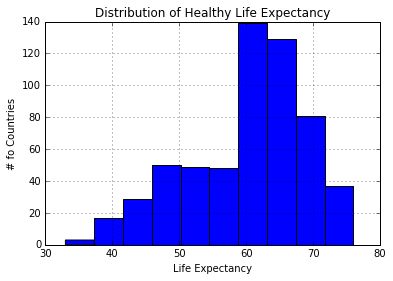

In [72]:
df_le.hist('HALEatBirth')
pyplot.ylabel("# fo Countries")
pyplot.xlabel("Life Expectancy")
pyplot.title("Distribution of Healthy Life Expectancy")


In [ ]:
df_le.Country = df_le.Country.astype('str')

In [ ]:
df_le.head()

In [ ]:
le_by_country = df_le.groupby('Country')

In [ ]:
le_by_country.describe()

In [ ]:
le_by_country.hist('HALEatBirth')

In [ ]:
def extract_country(value):
    if type(value) == type(np.NaN):
        return np.NaN
    return value.split(";")[0].strip(" ")

In [ ]:
df_le['Country'] = df_le['Country; Year'].apply(extract_country)

In [ ]:
df_le.Country.value_counts()

In [ ]:
# of countries
len(df_le.Country.unique())

In [ ]:
?df_le.count

In [ ]:
def extract_year(value):
    if type(value) == type(np.NaN):
        return np.NaN
    return value.split(";")[1].strip(" ")

In [ ]:
df_le['Year'] = df_le['Country; Year'].apply(extract_year)

In [ ]:
df_le.Year.value_counts()

In [ ]:
df_le.columns

In [ ]:
df_le[['Life expectancy at birth (years); Female', 'Life expectancy at birth (years); Male']].describe()

In [ ]:
df_le[['Life expectancy at birth (years); Female', 'Life expectancy at birth (years); Male']].plot()

In [ ]:
df_le['Healthy life expectancy (HALE) at birth (years); Both sexes'].dtype

In [ ]:
country = df_le.groupby('Country')
country.describe()

In [ ]:
country['Life expectancy at birth (years); Both sexes'].mean().plot(kind='barh')

In [ ]:
?country.plot()

In [ ]:
country['Life expectancy at birth (years); Both sexes'].mean()[country['Life expectancy at birth (years); Both sexes'].mean()<50].plot(kind='barh')

In [ ]:
country['Life expectancy at birth (years); Both sexes'].mean()[country['Life expectancy at birth (years); Both sexes'].mean()>80].plot(kind='barh')

In [ ]:
country.head()

In [ ]:
country['Healthy life expectancy (HALE) at birth (years); Both sexes'].head()

In [ ]:
country['Healthy life expectancy (HALE) at birth (years); Both sexes'].value_counts()

In [ ]:
df_c = pd.read_csv("research/Commitments_n_DisbursementsofAidbyCountry.csv")

In [ ]:
df_c.head()

In [ ]:
df_c.count()

In [ ]:
df_c.columns

In [ ]:
df_c['Country'] = df_c['Country; Year'].apply(extract_country)

In [ ]:
df_c['Year'] = df_c['Country; Year'].apply(extract_year)

In [ ]:
df_c.Country.unique()

In [ ]:
len(df_c.Country.unique())

In [ ]:
df_c.Year.value_counts()

In [ ]:
commitments_by_country = df_c.groupby('Country')

In [ ]:
commitments_by_country.describe()

In [ ]:
commitments_by_country.mean()

In [ ]:
commitments_by_country['Commitments to recipient countries (Million, constant 2009 US$)'].mean()

In [ ]:
commitments_by_country['Commitments to recipient countries (Million, constant 2009 US$)'].mean().plot()

In [ ]:
commitments_by_country['Commitments to recipient countries (Million, constant 2009 US$)'] \
.mean()[commitments_by_country['Commitments to recipient countries (Million, constant 2009 US$)'].mean()>250].plot(kind='barh')

In [ ]:
commitments_by_country['Disbursements to recipient countries (Million, constant 2009 US$)'] \
.mean()[commitments_by_country['Disbursements to recipient countries (Million, constant 2009 US$)'].mean()>250].plot(kind='barh')

In [ ]:
commitments_by_country